In [2]:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasRegressor

# Load the dataset
df = pd.read_csv('Family Income and Expenditure.csv')

# Load and preprocess the dataset
df = pd.read_csv('Family Income and Expenditure.csv')
features = ['Total Food Expenditure', 'Total Fish and  marine products Expenditure',
            'Clothing, Footwear and Other Wear Expenditure', 'Housing and water Expenditure',
            'Medical Care Expenditure', 'Transportation Expenditure', 'Communication Expenditure',
            'Miscellaneous Goods and Services Expenditure', 'Special Occasions Expenditure',
            'Total Income from Entrepreneurial Acitivites']
target = 'Total Household Income'

X = df[features].values
y = df[target].values

scaler = StandardScaler()  # Standardize features to have zero mean and unit variance
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
print('Linear Regression:')
print('Mean Squared Error:', mean_squared_error(y_test, lr_y_pred))
print('R2 Score:', r2_score(y_test, lr_y_pred))
print()

# Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
print('Decision Tree:')
print('Mean Squared Error:', mean_squared_error(y_test, dt_y_pred))
print('R2 Score:', r2_score(y_test, dt_y_pred))
print()

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
print('Random Forest:')
print('Mean Squared Error:', mean_squared_error(y_test, rf_y_pred))
print('R2 Score:', r2_score(y_test, rf_y_pred))
print()

# Support Vector Machines
svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
print('Support Vector Machines:')
print('Mean Squared Error:', mean_squared_error(y_test, svm_y_pred))
print('R2 Score:', r2_score(y_test, svm_y_pred))
print()

# K-Nearest Neighbors
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)
print('K-Nearest Neighbors:')
print('Mean Squared Error:', mean_squared_error(y_test, knn_y_pred))
print('R2 Score:', r2_score(y_test, knn_y_pred))
print()

# Neural Networks
nn_model = MLPRegressor()
nn_model.fit(X_train, y_train)
nn_y_pred = nn_model.predict(X_test)
print('Neural Networks:')
print('Mean Squared Error:', mean_squared_error(y_test, nn_y_pred))
print('R2 Score:', r2_score(y_test, nn_y_pred))
print()





# Define the neural network model with a convolutional layer
def create_model(n_hidden_layers=1, optimizer='adam', activation='relu', units=64, dropout_rate=0.2):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)))
    model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation=activation))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units, activation=activation))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    
    for i in range(n_hidden_layers):
        model.add(tf.keras.layers.Dense(units, activation=activation))
        model.add(tf.keras.layers.Dropout(dropout_rate))
    
    model.add(tf.keras.layers.Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Create a KerasRegressor object using Sci-Keras
nn_model = KerasRegressor(model=create_model, verbose=0)

# Define the hyperparameters to tune
param_grid = {
    'model__n_hidden_layers': [5],
    'model__units': [64],
    'model__dropout_rate': [0.2],
    'model__optimizer': ['rmsprop'],
    'model__activation': ['relu']
}

# Create a GridSearchCV object
grid = GridSearchCV(estimator=nn_model, param_grid=param_grid, cv=3)

# Fit the GridSearchCV object to the data
grid_result = grid.fit(X_train, y_train)

# Print the best hyperparameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Train the model with the best hyperparameters
best_params = {key.split('__')[1]: value for key, value in grid_result.best_params_.items()}
best_model = create_model(**best_params)
best_model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=0)

# Make predictions on the test set with the final model
y_pred = best_model.predict(X_test)

# Evaluate the model's accuracy
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('mse: ',mse)
print('r2_score: ',r2)

accuracy = r2 * 100
accuracy = round(accuracy, 2)
print('Accuracy:', accuracy, '%')

# Gradient Boosting Machines
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)
gbm_y_pred = gbm_model.predict(X_test)
print('Gradient Boosting Machines:')
print('Mean Squared Error:', mean_squared_error(y_test, gbm_y_pred))
print('R2 Score:', r2_score(y_test, gbm_y_pred))

Linear Regression:
Mean Squared Error: 10589504344.60427
R2 Score: 0.8538809165496709

Decision Tree:
Mean Squared Error: 22346219619.39054
R2 Score: 0.6916560942695256

Random Forest:
Mean Squared Error: 9983824203.157095
R2 Score: 0.8622383829855218

Support Vector Machines:
Mean Squared Error: 78009034140.92578
R2 Score: -0.07640624136723684

K-Nearest Neighbors:
Mean Squared Error: 12738732218.525068
R2 Score: 0.824224834749844



c:\Users\Swaga\anaconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Networks:
Mean Squared Error: 25863820187.250973
R2 Score: 0.6431185466946933

Best: 0.743545 using {'model__activation': 'relu', 'model__dropout_rate': 0.2, 'model__n_hidden_layers': 5, 'model__optimizer': 'rmsprop', 'model__units': 64}
260/260 [==============================] - 1s 4ms/step
mse:  9093549086.931778
r2_score:  0.8745228280141281
Accuracy: 87.45 %
Gradient Boosting Machines:
Mean Squared Error: 9698719508.707144
R2 Score: 0.8661723949359148


In [3]:
import plotly.graph_objects as go

# Define the model names and corresponding scores
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
               'K-Nearest Neighbors', 'Neural Networks', 'Gradient Boosting Machines']
mse_scores = [mean_squared_error(y_test, lr_y_pred), mean_squared_error(y_test, dt_y_pred),
              mean_squared_error(y_test, rf_y_pred), mean_squared_error(y_test, svm_y_pred),
              mean_squared_error(y_test, knn_y_pred), mean_squared_error(y_test, y_pred),
              mean_squared_error(y_test, gbm_y_pred)]
r2_scores = [r2_score(y_test, lr_y_pred), r2_score(y_test, dt_y_pred), r2_score(y_test, rf_y_pred),
             r2_score(y_test, svm_y_pred), r2_score(y_test, knn_y_pred), r2_score(y_test, y_pred),
             r2_score(y_test, gbm_y_pred)]

# Create a bar chart for MSE scores
mse_fig = go.Figure(data=[
    go.Bar(name='MSE', x=model_names, y=mse_scores)
])
mse_fig.update_layout(title='Mean Squared Error (MSE) Scores for Regression Models',
                      xaxis_title='Model', yaxis_title='MSE')
mse_fig.show()

# Create a bar chart for R2 scores
r2_fig = go.Figure(data=[
    go.Bar(name='R2 Score', x=model_names, y=r2_scores)
])
r2_fig.update_layout(title='R-squared (R2) Scores for Regression Models',
                     xaxis_title='Model', yaxis_title='R2 Score')
r2_fig.show()


In [4]:
import plotly.graph_objects as go

# Define the model names and corresponding scores
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
               'K-Nearest Neighbors', 'Neural Networks', 'Gradient Boosting Machines']
mse_scores = [mean_squared_error(y_test, lr_y_pred), mean_squared_error(y_test, dt_y_pred),
              mean_squared_error(y_test, rf_y_pred), mean_squared_error(y_test, svm_y_pred),
              mean_squared_error(y_test, knn_y_pred), mean_squared_error(y_test, y_pred),
              mean_squared_error(y_test, gbm_y_pred)]
r2_scores = [r2_score(y_test, lr_y_pred), r2_score(y_test, dt_y_pred), r2_score(y_test, rf_y_pred),
             r2_score(y_test, svm_y_pred), r2_score(y_test, knn_y_pred), r2_score(y_test, y_pred),
             r2_score(y_test, gbm_y_pred)]

# Create a table for MSE and R2 scores
table_fig = go.Figure(data=[
    go.Table(
        header=dict(values=['Model', 'MSE', 'R2 Score']),
        cells=dict(values=[model_names, mse_scores, r2_scores])
    )
])
table_fig.update_layout(title='Comparison of MSE and R2 Scores for Regression Models')
table_fig.show()


In [5]:
import plotly.graph_objects as go

# Define the model names and corresponding MSE scores
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machines',
               'K-Nearest Neighbors', 'Neural Networks', 'Gradient Boosting Machines']
mse_scores = [mean_squared_error(y_test, lr_y_pred), mean_squared_error(y_test, dt_y_pred),
              mean_squared_error(y_test, rf_y_pred), mean_squared_error(y_test, svm_y_pred),
              mean_squared_error(y_test, knn_y_pred), mean_squared_error(y_test, y_pred),
              mean_squared_error(y_test, gbm_y_pred)]

# Create the bar chart for MSE scores
fig = go.Figure(go.Bar(
            x=mse_scores,
            y=model_names,
            orientation='h',
            marker=dict(
                color='rgba(219, 64, 82, 0.6)',
                line=dict(
                    color='rgba(219, 64, 82, 1.0)',
                    width=1)
            )
        ))

# Set the layout for MSE chart
fig.update_layout(
    title='MSE Scores for Regression Models',
    xaxis=dict(title='MSE Score'),
    yaxis=dict(title='Model'),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)'
)

# Show the MSE chart
fig.show()


In [6]:
import plotly.graph_objects as go

# Define the model names and corresponding R2 scores
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machines',
               'K-Nearest Neighbors', 'Neural Networks', 'Gradient Boosting Machines']
r2_scores = [r2_score(y_test, lr_y_pred), r2_score(y_test, dt_y_pred), r2_score(y_test, rf_y_pred),
             r2_score(y_test, svm_y_pred), r2_score(y_test, knn_y_pred), r2_score(y_test, y_pred),
             r2_score(y_test, gbm_y_pred)]

# Create the bar chart for R2 scores
fig = go.Figure(go.Bar(
            x=r2_scores,
            y=model_names,
            orientation='h',
            marker=dict(
                color='rgba(50, 171, 96, 0.6)',
                line=dict(
                    color='rgba(50, 171, 96, 1.0)',
                    width=1)
            )
        ))

# Set the layout for R2 chart
fig.update_layout(
    title='R2 Scores for Regression Models',
    xaxis=dict(title='R2 Score'),
    yaxis=dict(title='Model'),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)'
)

# Show the R2 chart
fig.show()


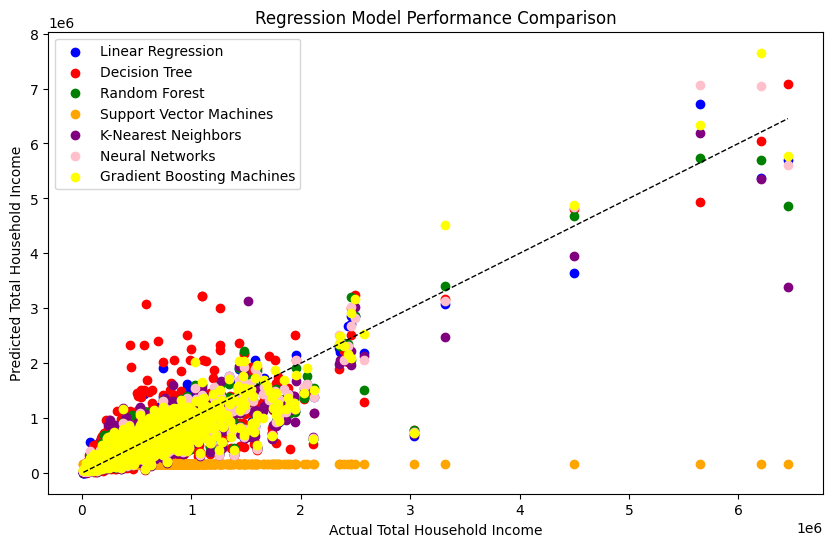

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the predicted values versus the actual values
plt.figure(figsize=(10, 6))

# Linear Regression
plt.scatter(y_test, lr_y_pred, color='blue', label='Linear Regression')

# Decision Tree
plt.scatter(y_test, dt_y_pred, color='red', label='Decision Tree')

# Random Forest
plt.scatter(y_test, rf_y_pred, color='green', label='Random Forest')

# Support Vector Machines
plt.scatter(y_test, svm_y_pred, color='orange', label='Support Vector Machines')

# K-Nearest Neighbors
plt.scatter(y_test, knn_y_pred, color='purple', label='K-Nearest Neighbors')

# Neural Networks
plt.scatter(y_test, y_pred, color='pink', label='Neural Networks')

# Gradient Boosting Machines
plt.scatter(y_test, gbm_y_pred, color='yellow', label='Gradient Boosting Machines')

# Plotting the perfect fit line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--', linewidth=1)

plt.xlabel('Actual Total Household Income')
plt.ylabel('Predicted Total Household Income')
plt.title('Regression Model Performance Comparison')
plt.legend()
plt.show()
